## 12.2 라이브러리/ 연습용 데이터 불러오기, 데이터 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://raw.githubusercontent.com/snkn1959/data_source/main/example_cluster.csv'
data = pd.read_csv(file_url)

In [2]:
data

,var_1,var_2
0,3.264413,6.929164
1,0.220814,2.251631
2,-8.786197,-8.333582
3,-0.008547,2.630791
4,4.912903,6.888520
...,...,...
995,4.678232,7.704404
996,5.250715,6.930948
997,-11.818752,-5.609853
998,0.613725,3.809334


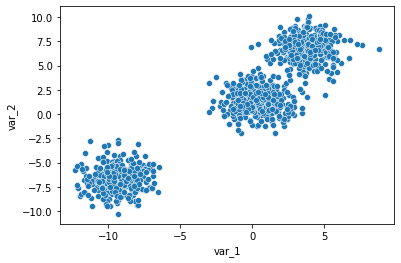

In [3]:
sns.scatterplot(x='var_1', y = 'var_2', data= data)

## 12.3 연습용 데이터 모델링 및 평가

In [4]:
from sklearn.cluster import KMeans

In [5]:
kmeans_model = KMeans(n_clusters=3, random_state = 100)

In [6]:
kmeans_model.fit(data)

KMeans(n_clusters=3, random_state=100)

In [7]:
kmeans_model.predict(data)

array([1, 2, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0,
       0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 2,
       0, 1, 1, 2, 0, 2, 1, 0, 1, 2, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1,
       2, 0, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1,
       0, 2, 1, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 2, 0, 1, 1, 0, 1,
       2, 1, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1,
       1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 0,
       2, 1, 0, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 1, 2, 0,
       2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0,
       1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2,
       2, 2, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 2,
       2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2,

In [8]:
data['label'] = kmeans_model.predict(data)

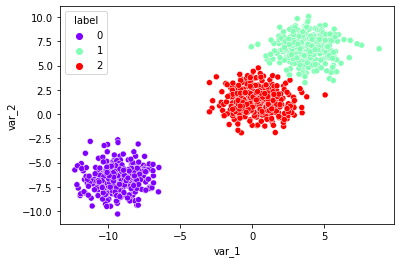

In [9]:
sns.scatterplot(x='var_1', y = 'var_2', data= data, hue='label', palette='rainbow')

## 12.3 엘보우 기법으로 최적의 K값 구하기

In [10]:
kmeans_model.inertia_

3090.03323707666

In [11]:
temp_model = KMeans(n_clusters=500, random_state = 100)
temp_model.fit(data)
temp_model.inertia_

6.22354210658421

In [12]:
distance = []   # ❶
for k in range(2,10):
    k_model = KMeans(n_clusters=k)
    k_model.fit(data)    
    distance.append(k_model.inertia_) # ❷

In [13]:
distance

[9908.551424778394,
 3090.03323707666,
 2717.3943078439797,
 2379.6404996021865,
 2049.429711146375,
 1827.5805703209694,
 1596.0800725762183,
 1370.1413654610615]

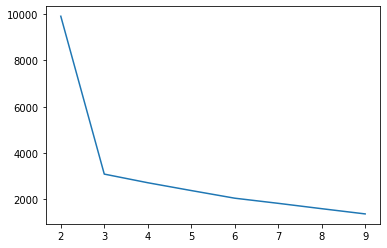

In [14]:
sns.lineplot(x=range(2,10), y=distance)

## 12.4 고객 데이터 불러오기 / 데이터 확인

In [41]:
file_url = 'https://raw.githubusercontent.com/snkn1959/data_source/main/customer.csv'
customer = pd.read_csv(file_url)

In [42]:
customer.head()

,cc_num,category,amt
0,2703186189652095,misc,4.97
1,630423337322,grocery,107.23
2,38859492057661,entertainment,220.11
3,3534093764340240,gas_transport,45.00
4,375534208663984,misc,41.96


In [17]:
customer['cc_num'].nunique()

100

## 12.5 피처 엔지니어링

In [18]:
customer_dummy = pd.get_dummies(customer, columns =['category'])

In [19]:
customer_dummy.head()

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,2703186189652095,4.97,0,0,0,0,0,0,0,1,0,0,0
1,630423337322,107.23,0,0,0,1,0,0,0,0,0,0,0
2,38859492057661,220.11,1,0,0,0,0,0,0,0,0,0,0
3,3534093764340240,45.00,0,0,1,0,0,0,0,0,0,0,0
4,375534208663984,41.96,0,0,0,0,0,0,0,1,0,0,0


In [21]:
cat_list = customer_dummy.columns[2:]

In [22]:
for i in cat_list:
    customer_dummy[i] = customer_dummy[i] * customer_dummy['amt']

In [23]:
customer_dummy

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,2703186189652095,4.97,0.00,0.0,0.0,0.00,0.00,0.0,0.0,4.97,0.0,0.00,0.0
1,630423337322,107.23,0.00,0.0,0.0,107.23,0.00,0.0,0.0,0.00,0.0,0.00,0.0
2,38859492057661,220.11,220.11,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0
3,3534093764340240,45.00,0.00,0.0,45.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0
4,375534208663984,41.96,0.00,0.0,0.0,0.00,0.00,0.0,0.0,41.96,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240449,4716561796955522,4.93,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,4.93,0.0
240450,30074693890476,140.12,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,140.12,0.0
240451,30404291151692,37.79,0.00,0.0,0.0,0.00,37.79,0.0,0.0,0.00,0.0,0.00,0.0
240452,4922710831011201,17.50,17.50,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0


In [24]:
customer_agg = customer_dummy.groupby('cc_num').sum()

In [25]:
customer_agg.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,48149.62,3169.74,4043.46,5076.36,7576.58,1631.22,5458.58,4924.97,4889.57,3135.25,8106.36,137.53
571365235126,259784.87,13864.51,9055.51,36525.79,48812.73,13685.60,19342.79,17726.82,32542.61,16672.08,45994.60,5561.83
571465035400,270081.63,16162.98,15448.75,9081.62,41643.82,15244.03,28282.98,13737.95,15880.82,8771.27,59454.96,46372.45
630412733309,41959.52,3212.46,1543.16,5786.98,8416.70,3201.04,2474.68,3648.97,3109.83,2592.17,7586.79,386.74
630423337322,244612.73,12786.75,6905.07,36460.40,43854.26,12136.74,21106.87,16807.24,32400.76,15885.32,44287.02,1982.30


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # ❶ 
scaled_df = pd.DataFrame(scaler.fit_transform(customer_agg), # ❷  
            columns = customer_agg.columns, # ❸ 
            index=customer_agg.index) # ❹


In [27]:
scaled_df.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930
571365235126,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587
571465035400,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891
630412733309,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675
630423337322,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796


## 12.6 고객 데이터 모델링 및 실루엣 계수 

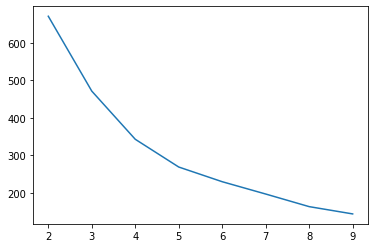

In [28]:
distance = []
for k in range(2,10):
    k_model = KMeans(n_clusters=k)
    k_model.fit(scaled_df)
    labels = k_model.predict(scaled_df)
    distance.append(k_model.inertia_)

sns.lineplot(x=range(2,10), y=distance)

In [29]:
from sklearn.metrics import silhouette_score

In [30]:
silhouette = []
for k in range(2,10):
    k_model = KMeans(n_clusters=k)
    k_model.fit(scaled_df)
    labels = k_model.predict(scaled_df)
    silhouette.append(silhouette_score(scaled_df, labels))

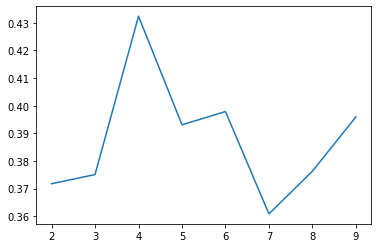

In [31]:
sns.lineplot(x=range(2,10), y=silhouette)

## 12.7 최종 예측 모델 및 결과 해석

In [32]:
k_model = KMeans(n_clusters=4)
k_model.fit(scaled_df)
labels = k_model.predict(scaled_df)

In [33]:
scaled_df['label'] = labels

In [34]:
scaled_df_mean = scaled_df.groupby('label').mean() # ❶ 
scaled_df_count = scaled_df.groupby('label').count()['category_travel'] # ❷ 

In [35]:
scaled_df_count = scaled_df_count.rename('count')

In [36]:
scaled_df_all = scaled_df_mean.join(scaled_df_count)

In [40]:
scaled_df_all

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,count
label,,,,,,,,,,,,,
0,-0.858082,-0.739555,-0.758078,-0.601061,-0.653905,-0.837854,-0.832432,-0.866100,-0.701383,-0.760106,-0.689347,-0.266604,45
1,0.311574,0.149105,0.212407,1.025558,0.109070,0.452339,0.369237,0.716395,0.378376,0.470040,0.010316,-0.264410,37
2,1.908120,2.155375,1.796299,-0.490418,2.290553,1.155923,0.943950,1.255997,2.005393,1.756210,2.272314,-0.262740,10
3,1.000533,0.776166,1.036432,-0.749213,0.310577,1.175961,1.794775,-0.011510,-0.311453,-0.093603,0.989477,3.050970,8
